In [1]:
import pandas as pd
import numpy as np
import pyodbc          #link to the data warehouse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  #acf and pacf plot
from datetime import datetime 
import matplotlib.pylab as plt

C:\Users\Helen.Tian\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
conn = pyodbc.connect("Driver={ODBC Driver 13 for SQL Server};Server=yetidb01.database.windows.net;database=YETISQLDW01;uid=htian;PWD=HeLeNtIAn52!")
cursor = conn.cursor()

In [3]:
# order_fct join product_dim // SalesOffice = STD + HYP execlude: 'TJX' and 'ACK LLC' // Core + not been cancelled + GrossPrice>0
df = pd.read_sql("SELECT O.OrderDate, O.ProductID, O.GrossPrice , O.SalesOffice, O.OrderQTY, P.ProductID, P.ProductCategory, P.MasterSKU, P.ProductType FROM [EDW].[ORDER_FCT] O left join [EDW].[PRODUCT_DIM] P on O.ProductID = P.ProductID WHERE O.SalesOffice = 'STD' or O.SalesOffice = 'HYB' and CustomerID != '91860' and CustomerID != '0000107894' and CustomerID != '0000114883' and P.ISCore = 'TRUE' and O.isCancelled = 'N' and O.GrossPrice>0 ", conn)

In [4]:
df.head()

,OrderDate,ProductID,GrossPrice,SalesOffice,OrderQTY,ProductID,ProductCategory,MasterSKU,ProductType
0,2017-03-30,10105010000,325.25,STD,1,10105010000,Hard Cooler,Tundra 105,Tundra
1,2018-02-09,21020070005,13.95,STD,3,21020070005,Gear & Apparel,Shirts,Gear
2,2018-01-03,20020010001,54.72,STD,1,20020010001,Hard Cooler,Corner Chocks,Tie Down
3,2018-04-09,18060130001,162.49,HYB,1,18060130001,Soft Cooler,Flip 12,Flip
4,2018-02-20,17045010000,129.99,HYB,1,17045010000,Hard Cooler,Tank 45,Tank


In [5]:
df1=df.copy()
o=[str(x.year)+'-'+str(x.month) for x in df1.OrderDate]
df1.OrderDate=[datetime.strptime(x,'%Y-%m')for x in o]  # change datetime from Y-M-D to Y-M-01 => same month


In [6]:
# Drinkware
DK=df1[df1.ProductCategory=='Drinkware']
DK = DK.sort_values(by='OrderDate', ascending=True)
dk = DK.groupby('OrderDate')['OrderQTY'].sum()[3:-6]

In [10]:
min(DK.OrderDate)

Timestamp('2013-10-01 00:00:00')

In [7]:
#DK[(DK['OrderDate'] >= '2014-01-01') & (DK['OrderDate'] < '2018-01-01')]

In [8]:
dk

OrderDate
2014-01-01        108
2014-02-01      18580
2014-03-01      12739
2014-04-01       3510
2014-05-01      19763
2014-06-01      42057
2014-07-01      76095
2014-08-01     107840
2014-09-01     116589
2014-10-01      86050
2014-11-01     116353
2014-12-01     454643
2015-01-01     220795
2015-02-01     292205
2015-03-01     593259
2015-04-01     679369
2015-05-01     319170
2015-06-01     691050
2015-07-01     961036
2015-08-01    1584980
2015-09-01    1398364
2015-10-01    2000301
2015-11-01    1740753
2015-12-01    4255714
2016-01-01     918899
2016-02-01     434985
2016-03-01     349590
2016-04-01    4665010
2016-05-01    2670233
2016-06-01    1539383
2016-07-01     513700
2016-08-01     612352
2016-09-01     437964
2016-10-01     243512
2016-11-01     281800
2016-12-01     478473
2017-01-01     173857
2017-02-01     935877
2017-03-01     561397
2017-04-01     844355
2017-05-01     519970
2017-06-01     899461
2017-07-01    1267902
2017-08-01     903334
2017-09-01     727955


In [9]:
avg1dk = [dk[:12]/np.sum(dk[:12])]
avg2dk = [dk[12:24]/np.sum(dk[12:24])]
avg3dk = [dk[24:36]/np.sum(dk[24:36])]
avg4dk = [dk[36:]/np.sum(dk[36:])]

In [10]:
q1=avg1dk[0].to_frame(name='Y2014').reset_index()['Y2014']
q2=avg2dk[0].to_frame(name='Y2015').reset_index()['Y2015']
q3=avg3dk[0].to_frame(name='Y2016').reset_index()['Y2016']
q4=avg4dk[0].to_frame(name='Y2017').reset_index()['Y2017']

In [11]:
D_K = pd.DataFrame(
    {'Y2014': q1,
     'Y2015': q2,
     'Y2016': q3,
     'Y2017': q4
    })

In [26]:
D_K.corr()

,Y2014,Y2015,Y2016,Y2017
Y2014,1.000000,0.959467,-0.322709,0.152978
Y2015,0.959467,1.000000,-0.331571,0.210490
Y2016,-0.322709,-0.331571,1.000000,-0.086284
Y2017,0.152978,0.210490,-0.086284,1.000000


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

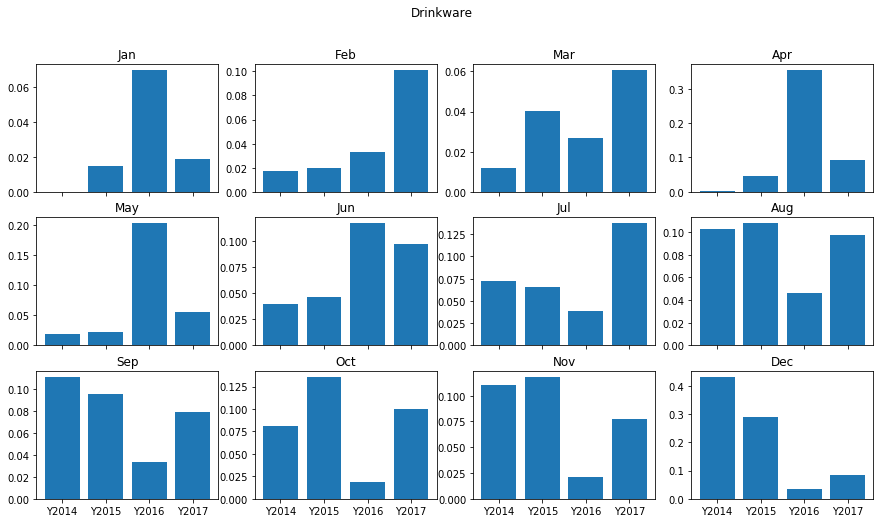

In [27]:
q=0
Mon = ['Jan','Feb','Mar', 'Apr', 'May','Jun','Jul','Aug','Sep', 'Oct','Nov','Dec']
f, axarr = plt.subplots(3, 4, figsize=(15,8))
for i in range(3):
    for j in range(4):
        axarr[i,j].bar(['Y2014','Y2015','Y2016','Y2017'],D_K.iloc[q] )
        axarr[i,j].set_title(Mon[q])
        q+=1
plt.suptitle("Drinkware")
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)

In [28]:
# Soft Cooler
SC=df1[df1.ProductCategory=='Soft Cooler']
SC = SC.sort_values(by='OrderDate', ascending=True)
sc = SC.groupby('OrderDate')['OrderQTY'].sum()[6:-6]

In [29]:
sc

OrderDate
2015-01-01     44779
2015-02-01     18895
2015-03-01     27864
2015-04-01     17533
2015-05-01     11932
2015-06-01     36721
2015-07-01     46208
2015-08-01     51986
2015-09-01     32288
2015-10-01     36622
2015-11-01     62843
2015-12-01    137481
2016-01-01     27786
2016-02-01     16071
2016-03-01     17971
2016-04-01    193879
2016-05-01     94062
2016-06-01     46894
2016-07-01     17182
2016-08-01     32702
2016-09-01     24892
2016-10-01     13999
2016-11-01     19220
2016-12-01     26335
2017-01-01      7244
2017-02-01     61039
2017-03-01     20298
2017-04-01     20549
2017-05-01     22201
2017-06-01     41636
2017-07-01    121969
2017-08-01     33510
2017-09-01     19287
2017-10-01     24161
2017-11-01     29268
2017-12-01     13345
Name: OrderQTY, dtype: int64

In [30]:
avg1sc = [sc[:12]/np.sum(sc[:12])]
avg2sc = [sc[12:24]/np.sum(sc[12:24])]
avg3sc = [sc[24:]/np.sum(sc[24:])]

In [31]:
q1=avg1sc[0].to_frame(name='Y2015').reset_index()['Y2015']
q2=avg2sc[0].to_frame(name='Y2016').reset_index()['Y2016']
q3=avg3sc[0].to_frame(name='Y2017').reset_index()['Y2017']

In [32]:
S_C = pd.DataFrame(
    {'Y2015': q1,
     'Y2016': q2,
     'Y2017': q3
    })

In [35]:
S_C.corr()

,Y2015,Y2016,Y2017
Y2015,1.000000,-0.333493,-0.123009
Y2016,-0.333493,1.000000,-0.217551
Y2017,-0.123009,-0.217551,1.000000


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

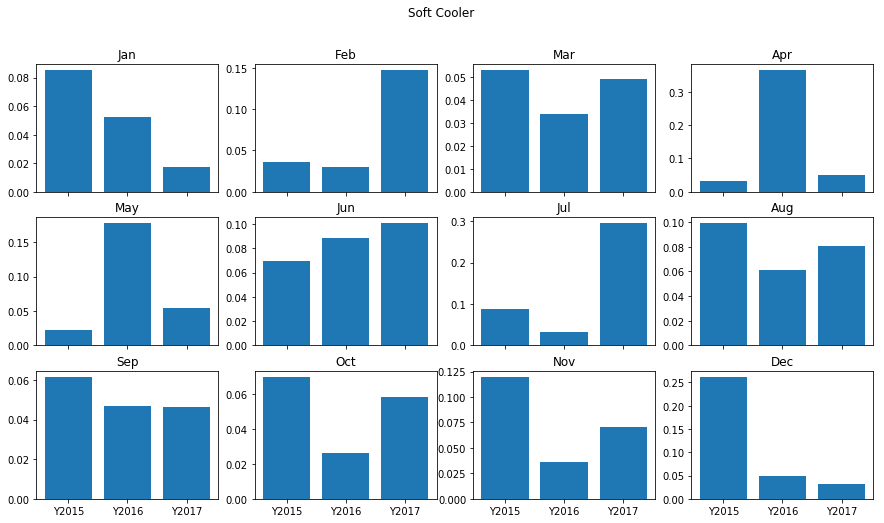

In [36]:
q=0
Mon = ['Jan','Feb','Mar', 'Apr', 'May','Jun','Jul','Aug','Sep', 'Oct','Nov','Dec']
f, axarr = plt.subplots(3, 4, figsize=(15,8))
for i in range(3):
    for j in range(4):
        axarr[i,j].bar(['Y2015','Y2016','Y2017'],S_C.iloc[q] )
        axarr[i,j].set_title(Mon[q])
        q+=1
plt.suptitle("Soft Cooler")
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)

In [37]:
# Hard Cooler
HC=df1[df1.ProductCategory=='Hard Cooler']
HC = HC.sort_values(by='OrderDate', ascending=True)
hc = HC.groupby('OrderDate')['OrderQTY'].sum()[7:-6]

In [38]:
hc

OrderDate
2013-01-01       316
2013-02-01      5110
2013-03-01      3591
2013-04-01     20170
2013-05-01     26030
2013-06-01     37181
2013-07-01     35080
2013-08-01     37810
2013-09-01     40355
2013-10-01     22016
2013-11-01     22656
2013-12-01     24691
2014-01-01     18512
2014-02-01     33460
2014-03-01     33317
2014-04-01     23693
2014-05-01     30926
2014-06-01     47379
2014-07-01     43479
2014-08-01     42813
2014-09-01     42784
2014-10-01     37930
2014-11-01     38532
2014-12-01     65646
2015-01-01     23333
2015-02-01     28800
2015-03-01     38501
2015-04-01     36921
2015-05-01     64221
2015-06-01     79317
2015-07-01     83887
2015-08-01    115677
2015-09-01     94783
2015-10-01     86725
2015-11-01     60609
2015-12-01    149187
2016-01-01     29571
2016-02-01     21569
2016-03-01     20700
2016-04-01    181912
2016-05-01     89217
2016-06-01     54660
2016-07-01     36058
2016-08-01     56108
2016-09-01     39514
2016-10-01     17731
2016-11-01     19169
201

In [39]:
avg1hc = [hc[:12]/np.sum(hc[:12])]
avg2hc = [hc[12:24]/np.sum(hc[12:24])]
avg3hc = [hc[24:36]/np.sum(hc[24:36])]
avg4hc = [hc[36:48]/np.sum(hc[36:48])]
avg5hc = [hc[48:]/np.sum(hc[48:])]

In [40]:
q1=avg1hc[0].to_frame(name='Y2013').reset_index()['Y2013']
q2=avg2hc[0].to_frame(name='Y2014').reset_index()['Y2014']
q3=avg3hc[0].to_frame(name='Y2015').reset_index()['Y2015']
q4=avg4hc[0].to_frame(name='Y2016').reset_index()['Y2016']
q5=avg5hc[0].to_frame(name='Y2017').reset_index()['Y2017']

In [41]:
H_C = pd.DataFrame(
    {'Y2013': q1,
     'Y2014': q2,
     'Y2015': q3,
     'Y2016': q4,
     'Y2017': q5
    })

In [42]:
H_C.corr()

,Y2013,Y2014,Y2015,Y2016,Y2017
Y2013,1.000000,0.562958,0.701573,0.155165,0.078376
Y2014,0.562958,1.000000,0.887737,-0.349561,0.117458
Y2015,0.701573,0.887737,1.000000,-0.187876,-0.117589
Y2016,0.155165,-0.349561,-0.187876,1.000000,-0.193609
Y2017,0.078376,0.117458,-0.117589,-0.193609,1.000000


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

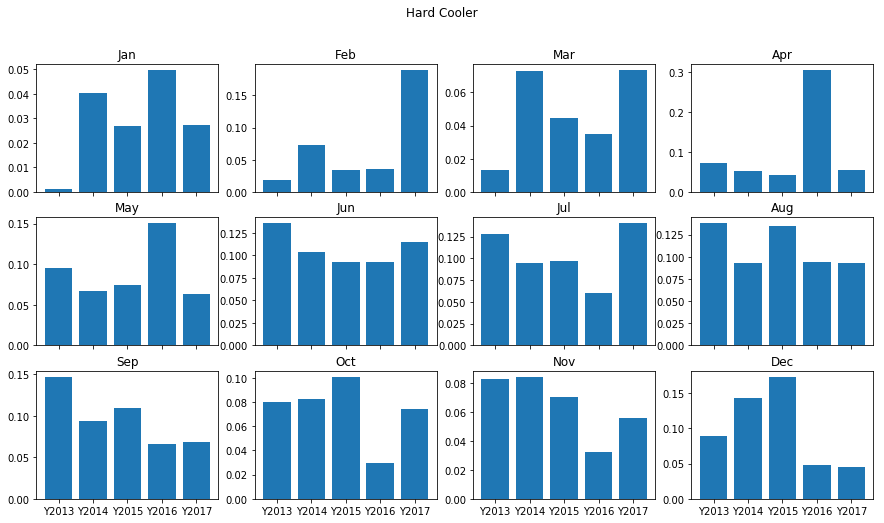

In [21]:
q=0
Mon = ['Jan','Feb','Mar', 'Apr', 'May','Jun','Jul','Aug','Sep', 'Oct','Nov','Dec']
f, axarr = plt.subplots(3, 4, figsize=(15,8))
for i in range(3):
    for j in range(4):
        axarr[i,j].bar(['Y2013', 'Y2014','Y2015','Y2016','Y2017'],H_C.iloc[q] )
        axarr[i,j].set_title(Mon[q])
        q+=1
plt.suptitle("Hard Cooler")
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)  